In [630]:
# Import dataset as downloaded from kaggle
import pandas as pd

import warnings  # ignore all warnings
warnings.filterwarnings('ignore')

df = pd.read_csv("Titanic-Dataset.csv") # Read dataset from local directory

In [631]:
# Check shape
df.shape

(891, 12)

In [632]:
# Check how look dataset
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [633]:
# Knowing the dataset
"""
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	no. of siblings / spouses aboard the Titanic	
parch	no. of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
"""

'\nsurvival\tSurvival\t0 = No, 1 = Yes\npclass\tTicket class\t1 = 1st, 2 = 2nd, 3 = 3rd\nsex\tSex\t\nAge\tAge in years\t\nsibsp\tno. of siblings / spouses aboard the Titanic\t\nparch\tno. of parents / children aboard the Titanic\t\nticket\tTicket number\t\nfare\tPassenger fare\t\ncabin\tCabin number\t\nembarked\tPort of Embarkation\tC = Cherbourg, Q = Queenstown, S = Southampton\n'

In [634]:
# Check Data Type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [635]:
# Check missing value
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [636]:
# check data look mathematically
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [637]:
# Check duplicate values
df.duplicated().sum()

np.int64(0)

In [638]:
# Handle missing values of object values using sklearn SimpleImputer
from sklearn.impute import SimpleImputer
sim_obj = SimpleImputer(strategy='most_frequent')
df[['Cabin','Embarked']] = sim_obj.fit_transform(df[['Cabin','Embarked']])

In [639]:
# Handle missing values of object values using sklearn SimpleImputer
sim_int = SimpleImputer(strategy='mean')
df[['Age']] = sim_int.fit_transform(df[['Age']])
df['Age'] = df['Age'].astype('int64')

In [640]:
# Check missing value
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [641]:
# Save clean data
df.to_csv('new_df.csv')

In [642]:
# import clean data
df = pd.read_csv('new_df.csv')
df.drop(columns=['Unnamed: 0'],inplace=True)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,B96 B98,S


In [643]:
# Encoding Name Columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_name = LabelEncoder()
df['Name'] = le_name.fit_transform(df[['Name']])

In [644]:
# Encoding Cabin Columns using LabelEncoder
le_cabin = LabelEncoder()
df['Cabin'] = le_cabin.fit_transform(df[['Cabin']])

In [645]:
# Encoding Ticket Columns using LabelEncoder
le_tckt = LabelEncoder()
df['Ticket'] = le_tckt.fit_transform(df[['Ticket']])

In [646]:
# Encoding Sex Columns using map function
o_sex = {'male':0,'female':1}
df['Sex'] = df['Sex'].map(o_sex)
df['Sex'] = df['Sex'].astype('int64') # change dtype float to int 

In [647]:
# Encoding Embarked Columns using map function
o_embark = {'C':0,'Q':1,'S':2}
df['Embarked'] = df['Embarked'].map(o_embark)
df['Embarked'] = df['Embarked'].astype('int64') # change dtype object to int 

In [648]:
# Check Data Type of Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(1), int64(11)
memory usage: 83.7 KB


In [649]:
# After Enconding,all categorical values covert into numerical values
print('<--------------------------------------------------Data Cleaning Done--------------------------------------------------->')
df.head(10)

<--------------------------------------------------Data Cleaning Done--------------------------------------------------->


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,0,22,1,0,523,7.2500,47,2
1,2,1,1,190,1,38,1,0,596,71.2833,81,0
2,3,1,3,353,1,26,0,0,669,7.9250,47,2
3,4,1,1,272,1,35,1,0,49,53.1000,55,2
4,5,0,3,15,0,35,0,0,472,8.0500,47,2
5,6,0,3,554,0,29,0,0,275,8.4583,47,1
6,7,0,1,515,0,54,0,0,85,51.8625,129,2
7,8,0,3,624,0,2,3,1,395,21.0750,47,2
8,9,1,3,412,1,27,0,2,344,11.1333,47,2
9,10,1,2,576,1,14,1,0,132,30.0708,47,0


In [650]:
# Data Transformation using Normalizer
from sklearn.preprocessing import Normalizer
ss = Normalizer()
arr = ss.fit_transform(df)
df = pd.DataFrame(arr,columns=df.columns)

In [651]:
# After Data Transformation
print('<----------------------------------------------Data Transformation Done------------------------------------------------>')
df.head(10)

<----------------------------------------------Data Transformation Done------------------------------------------------>


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.001864,0.000000,0.005591,0.201262,0.000000,0.040998,0.001864,0.000000,0.974632,0.013511,0.087586,0.003727
1,0.003145,0.001572,0.001572,0.298774,0.001572,0.059755,0.001572,0.000000,0.937206,0.112093,0.127372,0.000000
2,0.003956,0.001319,0.003956,0.465465,0.001319,0.034284,0.000000,0.000000,0.882142,0.010450,0.061974,0.002637
3,0.013844,0.003461,0.003461,0.941415,0.003461,0.121138,0.003461,0.000000,0.169593,0.183784,0.190360,0.006922
4,0.010505,0.000000,0.006303,0.031515,0.000000,0.073534,0.000000,0.000000,0.991663,0.016913,0.098746,0.004202
5,0.009661,0.000000,0.004830,0.892031,0.000000,0.046695,0.000000,0.000000,0.442795,0.013619,0.075678,0.001610
6,0.012893,0.000000,0.001842,0.948593,0.000000,0.099464,0.000000,0.000000,0.156564,0.095527,0.237609,0.003684
7,0.010805,0.000000,0.004052,0.842824,0.000000,0.002701,0.004052,0.001351,0.533518,0.028466,0.063482,0.002701
8,0.016677,0.001853,0.005559,0.763432,0.001853,0.050031,0.000000,0.003706,0.637428,0.020630,0.087091,0.003706
9,0.016840,0.001684,0.003368,0.969999,0.001684,0.023576,0.001684,0.000000,0.222291,0.050640,0.079149,0.000000


In [652]:
# Check Cor-relation between all columns
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,1.000000,0.012909,-0.186882,-0.581724,-0.045066,-0.064495,-0.091646,-0.035455,-0.427741,0.017570,-0.051256,-0.063916
Survived,0.012909,1.000000,0.139120,-0.070815,0.598121,0.319117,0.111725,0.188202,-0.102919,0.358846,0.456070,0.259238
Pclass,-0.186882,0.139120,1.000000,-0.163631,0.158287,0.307278,0.204632,0.180870,0.392818,-0.155059,0.354345,0.471107
Name,-0.581724,-0.070815,-0.163631,1.000000,-0.061456,-0.059680,-0.100199,-0.133841,-0.309240,-0.119071,-0.112783,-0.115682
Sex,-0.045066,0.598121,0.158287,-0.061456,1.000000,0.243190,0.194013,0.257994,-0.008829,0.270402,0.301690,0.165351
Age,-0.064495,0.319117,0.307278,-0.059680,0.243190,1.000000,-0.060805,-0.028949,-0.022839,0.244370,0.496423,0.467699
SibSp,-0.091646,0.111725,0.204632,-0.100199,0.194013,-0.060805,1.000000,0.443508,0.124536,0.247476,0.149662,0.198016
Parch,-0.035455,0.188202,0.180870,-0.133841,0.257994,-0.028949,0.443508,1.000000,0.076794,0.301250,0.166773,0.195103
Ticket,-0.427741,-0.102919,0.392818,-0.309240,-0.008829,-0.022839,0.124536,0.076794,1.000000,-0.117805,-0.011507,0.072436
Fare,0.017570,0.358846,-0.155059,-0.119071,0.270402,0.244370,0.247476,0.301250,-0.117805,1.000000,0.319937,0.145230


In [653]:
# drop PassengerId because of low cor-relation
df.drop(columns=['PassengerId'],inplace=True)

[]

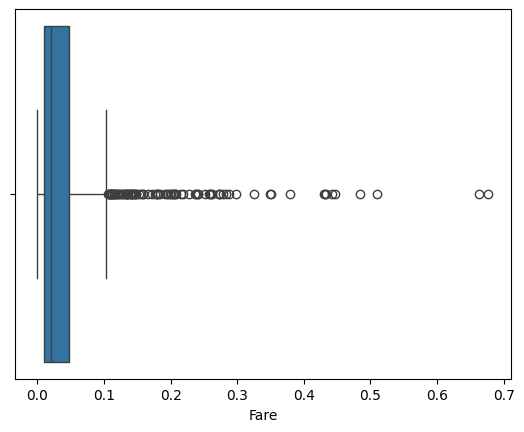

In [654]:
# Check Outliers in Flare using Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Fare'],data=df)
plt.plot()

In [655]:
# Remove Outliers
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

[]

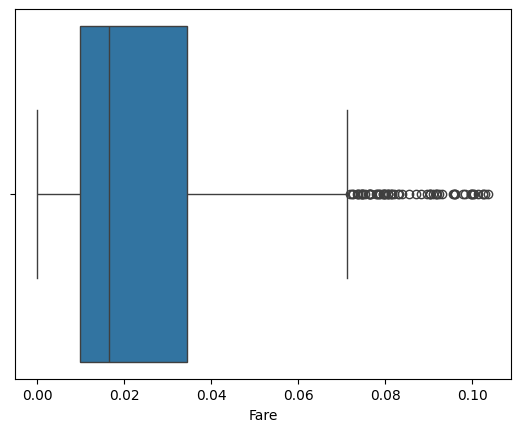

In [656]:
# Check Outliers in Flare using Boxplot
import matplotlib.pyplot as plt
import seaborn as sns
sns.boxplot(x=df['Fare'],data=df)
plt.plot()

In [657]:
# Segregate dataset into X and y
X = df.iloc[0:,1:]
y = df['Survived']

In [658]:
# split X and y in train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [659]:
""" Train this data on a different machine learning model """

' Train this data on a different machine learning model '